<h1 align='center' style='color:blue'><em>Author : Sumit Mohod</em></h1>

---

<blockquote>Data Science and Business Analytics internship</blockquote>

<blockquote>The Sparks Foundation GRIP</blockquote>

<blockquote>Batch : December 2020</blockquote>

<blockquote>Task 6: Prediction using Decision Tree Classifier Algorithm</blockquote>

---

<h1>Supervised ML using Decision Tree Classifier Algorithm</h1>

<p>In this Supervised ML task, we are given 'iris' dataset to perform Decision Tree Classifier Algorithm. From the given ‘Iris.csv’ dataset, we will create the Decision Tree classifier and visualize it graphically.</p>

<blockquote><B>Task Objective</B> : From the given ‘Iris’ dataset, Create the Decision Tree classifier and visualize it graphically</blockquote>

<blockquote><h4>About Iris Dataset:</h4>
<center><img src='https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png'></center>
<p>Iris flower data set was introduced by the British statistician and biologist Ronald Fisher in 1936. Iris data set gives the measurements in centimetres of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris. The species are Iris <b>setosa</b>, <b>versicolor</b>, and <b>virginica</b>.</p>
    
There are 4 features: 
<OL>
    <li><b>sepalLength</b>: sepal length in cm</li>
    <li><b>sepalWidth</b>: sepal width in cm</li>
    <li><b>petalLength</b>: petal length in cm</li>
    <li><b>petalWidth</b>: petal width in cm</li>
</OL>
    
There are 3 classes representing class label of iris flower species 
<OL>
    <li>Iris Setosa</li>
    <li>Iris Versicolour</li>
    <li>Iris Virginica</li>
</OL>    
</blockquote> 
<br><br>

<center><img src='iris_flower.jpg' width='750' height='300'></center>

---

In [1]:
# First I am importing the important libraries required in this notebook
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading dataset
iris_df = pd.read_csv('Iris.csv', index_col='Id')

iris_df.head()         # See the first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print('The size of Dataframe is: ', iris_df.shape)
print('\n')
iris_df.info()

The size of Dataframe is:  (150, 5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
# To find total_missing_values in different columns of data and their percentage
def missing_data(data):
    """
    This will take in a dataframe and 
    finds the total_missing_values as well as percentage of the value counts
    """
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [5]:
missing_data(data= iris_df)

,Total,Percent
Species,0,0.0
PetalWidthCm,0,0.0
PetalLengthCm,0,0.0
SepalWidthCm,0,0.0
SepalLengthCm,0,0.0


As from above dataframe, my observation on missing data are: 
<UL>
   <li>There is no missing values in our dataset.
   <li>Therefore there is no need of data cleaning.
</UL>

In [6]:
# To find descriptive statistic summary on the data I used function below:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Let's explore unique values in some category
print("Unique values for feature 'Species': ", iris_df['Species'].unique().tolist())

Unique values for feature 'Species':  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


## Data Visualization

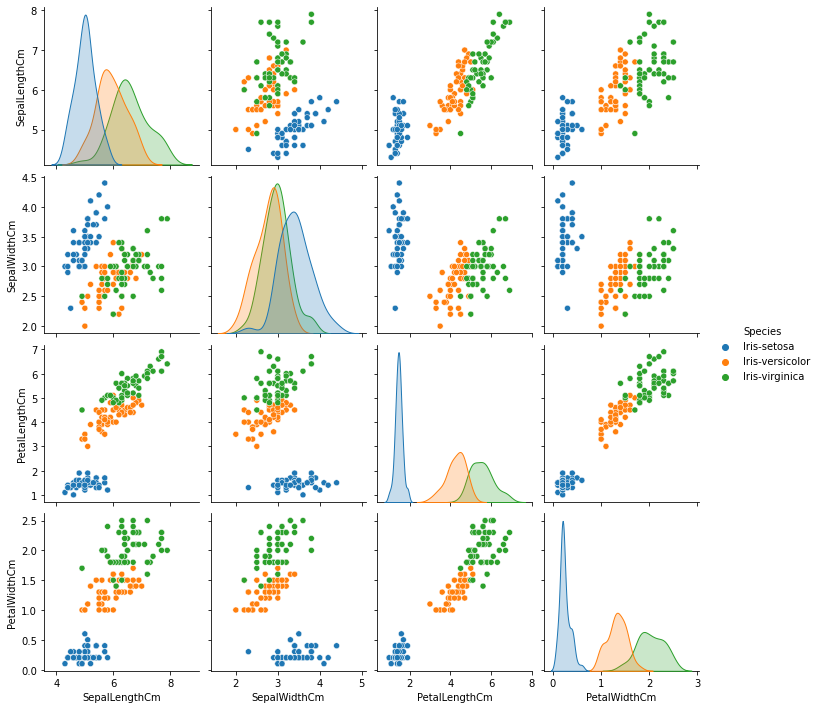

In [8]:
# Here, I produced a pairplot to look at these characteristics for each class using scatterplots. 

sns.pairplot(data= iris_df, hue= 'Species')       

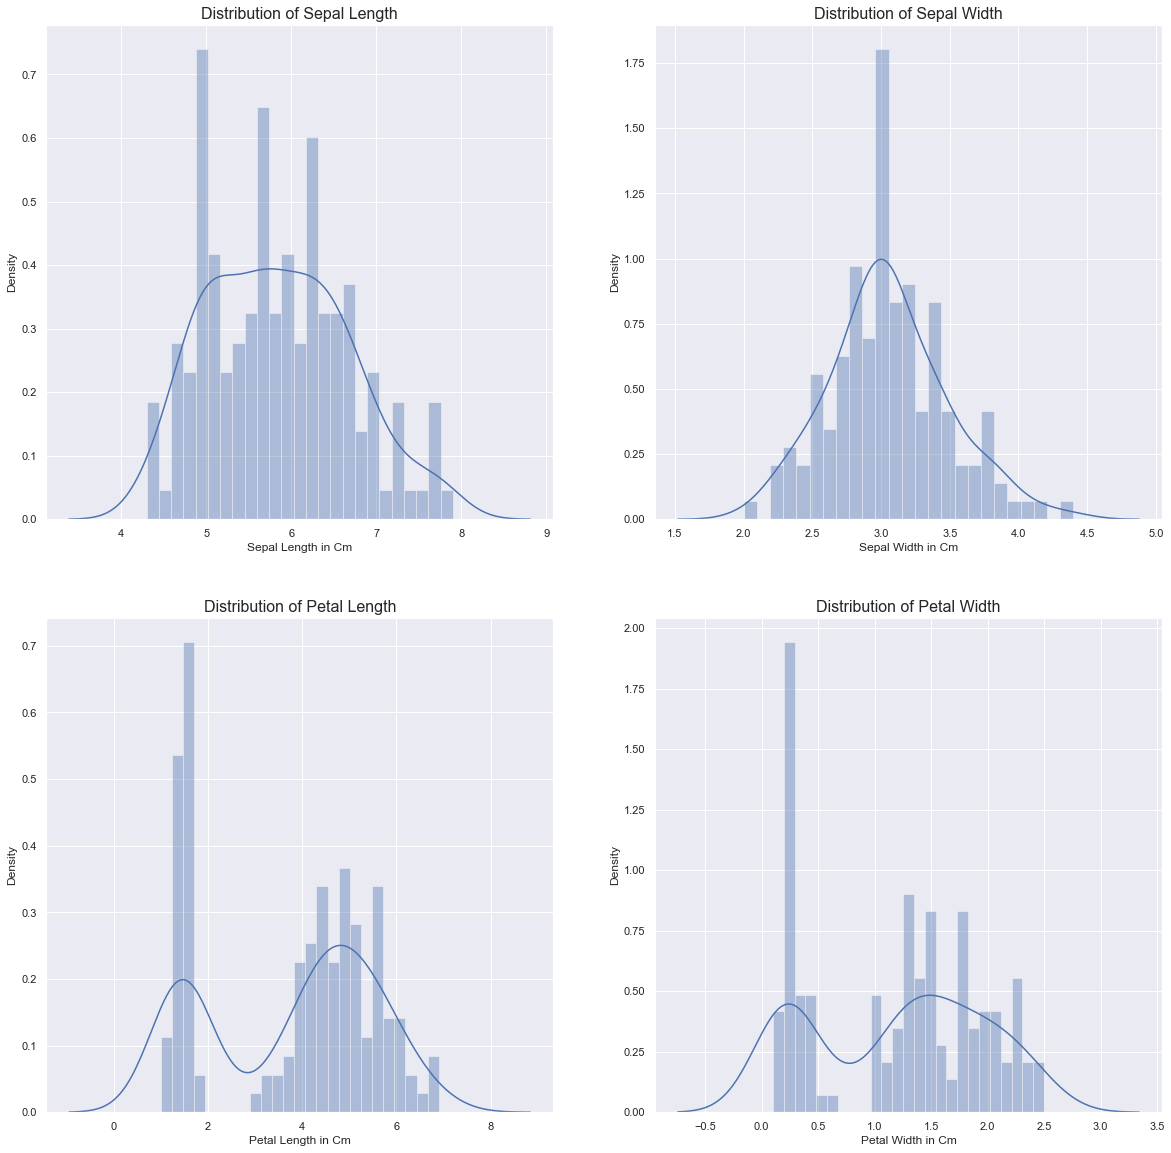

In [9]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distribution plot of 'SepalLengthCm' feature
k1 = sns.distplot(iris_df['SepalLengthCm'], bins=25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Sepal Length', fontsize=16)
ax0.set(xlabel= 'Sepal Length in Cm', ylabel= 'Density')

# Subplot 2: Distribution plot of 'SepalWidthCm' feature
k2 = sns.distplot(iris_df['SepalWidthCm'], bins=25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Sepal Width', fontsize=16)
ax1.set(xlabel= 'Sepal Width in Cm', ylabel= 'Density')

# Subplot 1: Distribution plot of 'PetalLengthCm' feature
k1 = sns.distplot(iris_df['PetalLengthCm'], bins=25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Petal Length', fontsize=16)
ax2.set(xlabel= 'Petal Length in Cm', ylabel= 'Density')

# Subplot 1: Distribution plot of 'PetalWidthCm' feature
k1 = sns.distplot(iris_df['PetalWidthCm'], bins=25, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Petal Width', fontsize=16)
ax3.set(xlabel= 'Petal Width in Cm', ylabel= 'Density')

plt.show()

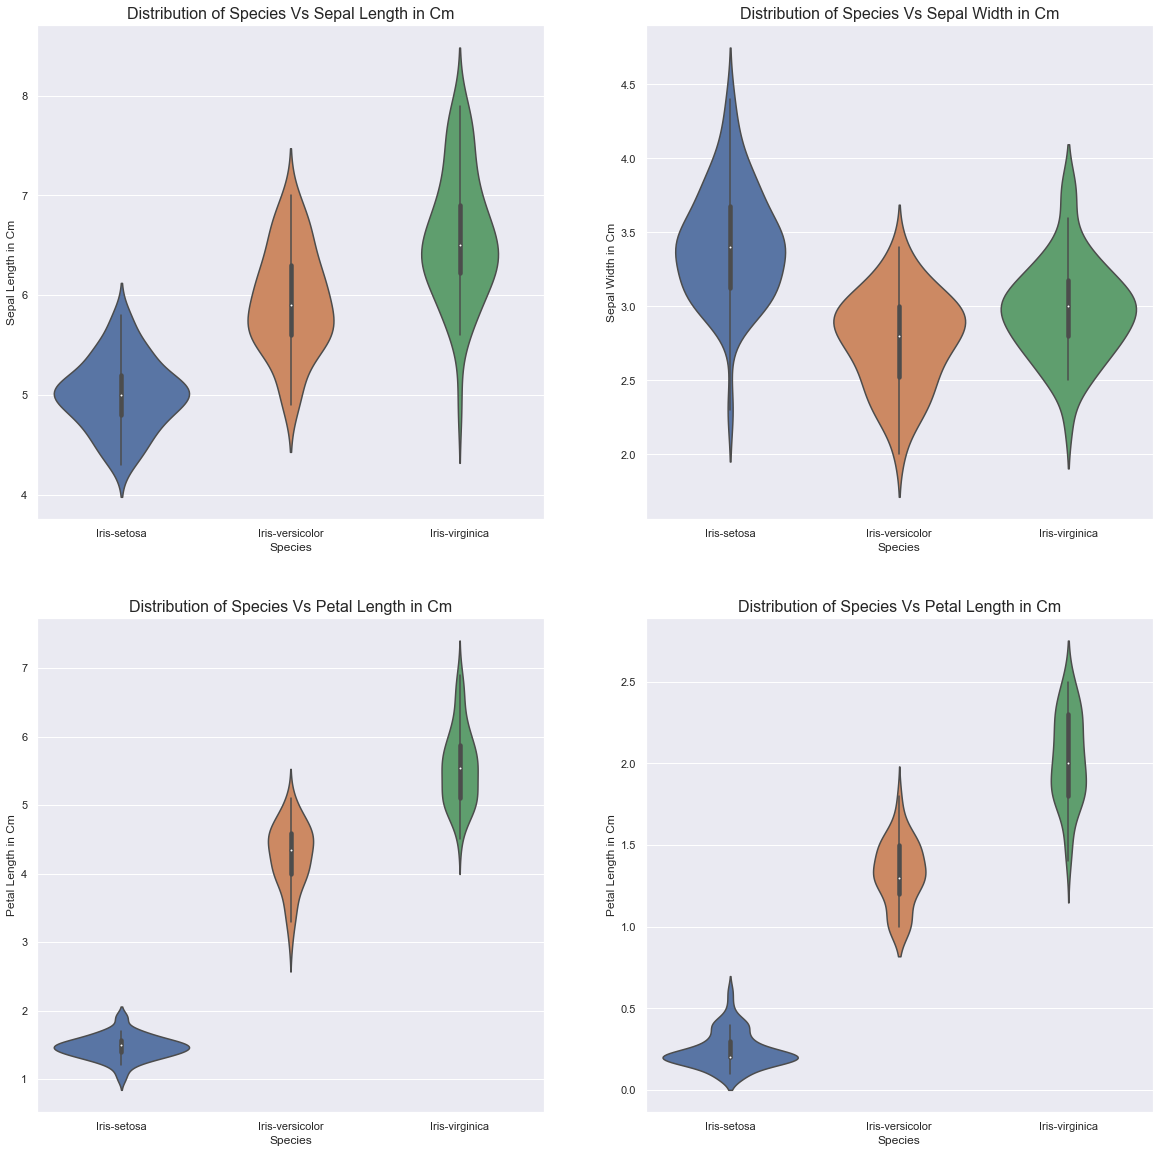

In [10]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distribution plot of 'Species Vs Sepal Length in Cm'
k1 = sns.violinplot(data= iris_df, x= 'Species', y= 'SepalLengthCm', ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Species Vs Sepal Length in Cm', fontsize=16)
ax0.set(xlabel= 'Species', ylabel= 'Sepal Length in Cm')

# Subplot 2: Distribution plot of 'Species Vs Sepal Length in Cm'
k2 = sns.violinplot(data= iris_df, x= 'Species', y= 'SepalWidthCm', ax=ax1) # add to subplot 2           
ax1.set_title('Distribution of Species Vs Sepal Width in Cm', fontsize=16)
ax1.set(xlabel= 'Species', ylabel= 'Sepal Width in Cm')

# Subplot 1: Distribution plot of 'Species Vs Sepal Length in Cm'
k1 = sns.violinplot(data= iris_df, x= 'Species', y= 'PetalLengthCm', ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Species Vs Petal Length in Cm', fontsize=16)
ax2.set(xlabel= 'Species', ylabel= 'Petal Length in Cm')

# Subplot 1: Distribution plot of 'Species Vs Sepal Length in Cm'
k1 = sns.violinplot(data= iris_df, x= 'Species', y= 'PetalWidthCm', ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Species Vs Petal Length in Cm', fontsize=16)
ax3.set(xlabel= 'Species', ylabel= 'Petal Length in Cm')

plt.show()

* The graphs reveal a smaller mean Petal length and width for the Setosa class and quite a bit of variation between the three classess.
* On the other  hand, there is less variation with Sepal length and width.

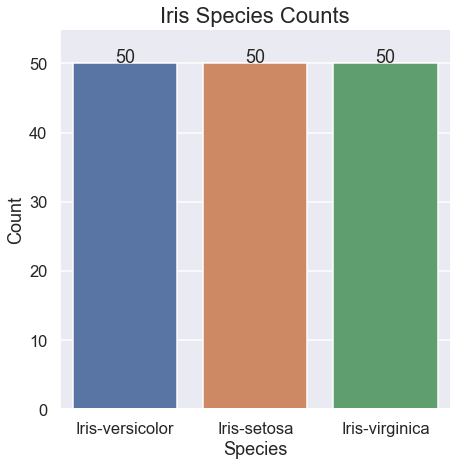

In [11]:
plt.figure(figsize=(7,7))
sns.set_context("talk")

iris_species = iris_df['Species'].value_counts()
sns.countplot(data = iris_df, x = 'Species', order = iris_species.index)
plt.xlabel('Species')
plt.ylabel('Count')
plt.ylim(0,55)
plt.title('Iris Species Counts', fontsize=22)

for i in range(iris_species.shape[0]):
    count = iris_species[i]
    strt='{}'.format(count)
    plt.text(i,count + 0.2, strt, ha='center')

The species column contains 3 species of iris flower namely virginica, versicolor and setosa each 50 in number.

<AxesSubplot:>

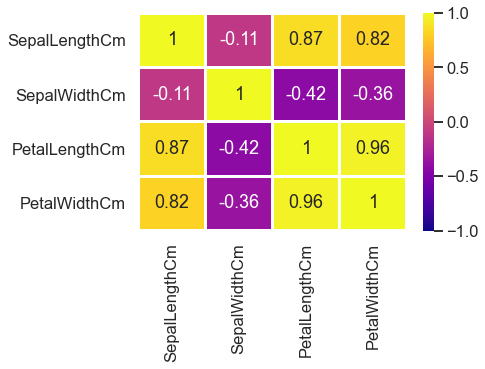

In [12]:
# A Heatmap is also helpful when used with corr() to look for correlation
sns.heatmap(data = iris_df.corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)

- Petal Lenght is highly related with Petal Width. They have positive correlation between them which is <b>0.96</b>.

In [13]:
# After I'm comfortable with the data, I proceed to separate the data and drop any columns not needed
# I'm basically isolating the features for Model training in this step as "X" 
X = iris_df.drop(labels= 'Species', axis= 1)

# Here I identify the Target Variable and set it as "y"
y = iris_df['Species']

In [14]:
# I usually use 25% for test size, but in this case, I'm going to use it 30%. Since, total data size is very less.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 0)

In [15]:
# we will train the model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1234)

# we will train the model
classifier.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

## EVALUATING THE MODEL

In [16]:
prediction= classifier.predict(X= X_test)

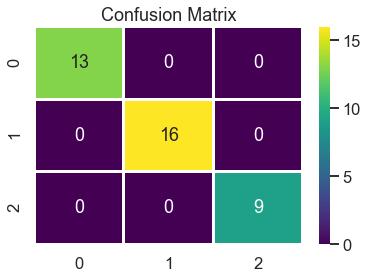


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [17]:
# Confusion Matix
sns.heatmap(data = confusion_matrix(y_true= y_test, y_pred= prediction), annot= True, \
            cmap = 'viridis', vmin= 0, vmax= 16, linecolor='white', linewidths=2)
plt.title('Confusion Matrix', fontsize= 18)
plt.show()

# Classification Report
print('\nClassification Report:\n', classification_report(y_true= y_test, y_pred= prediction))

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [18]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



In [19]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

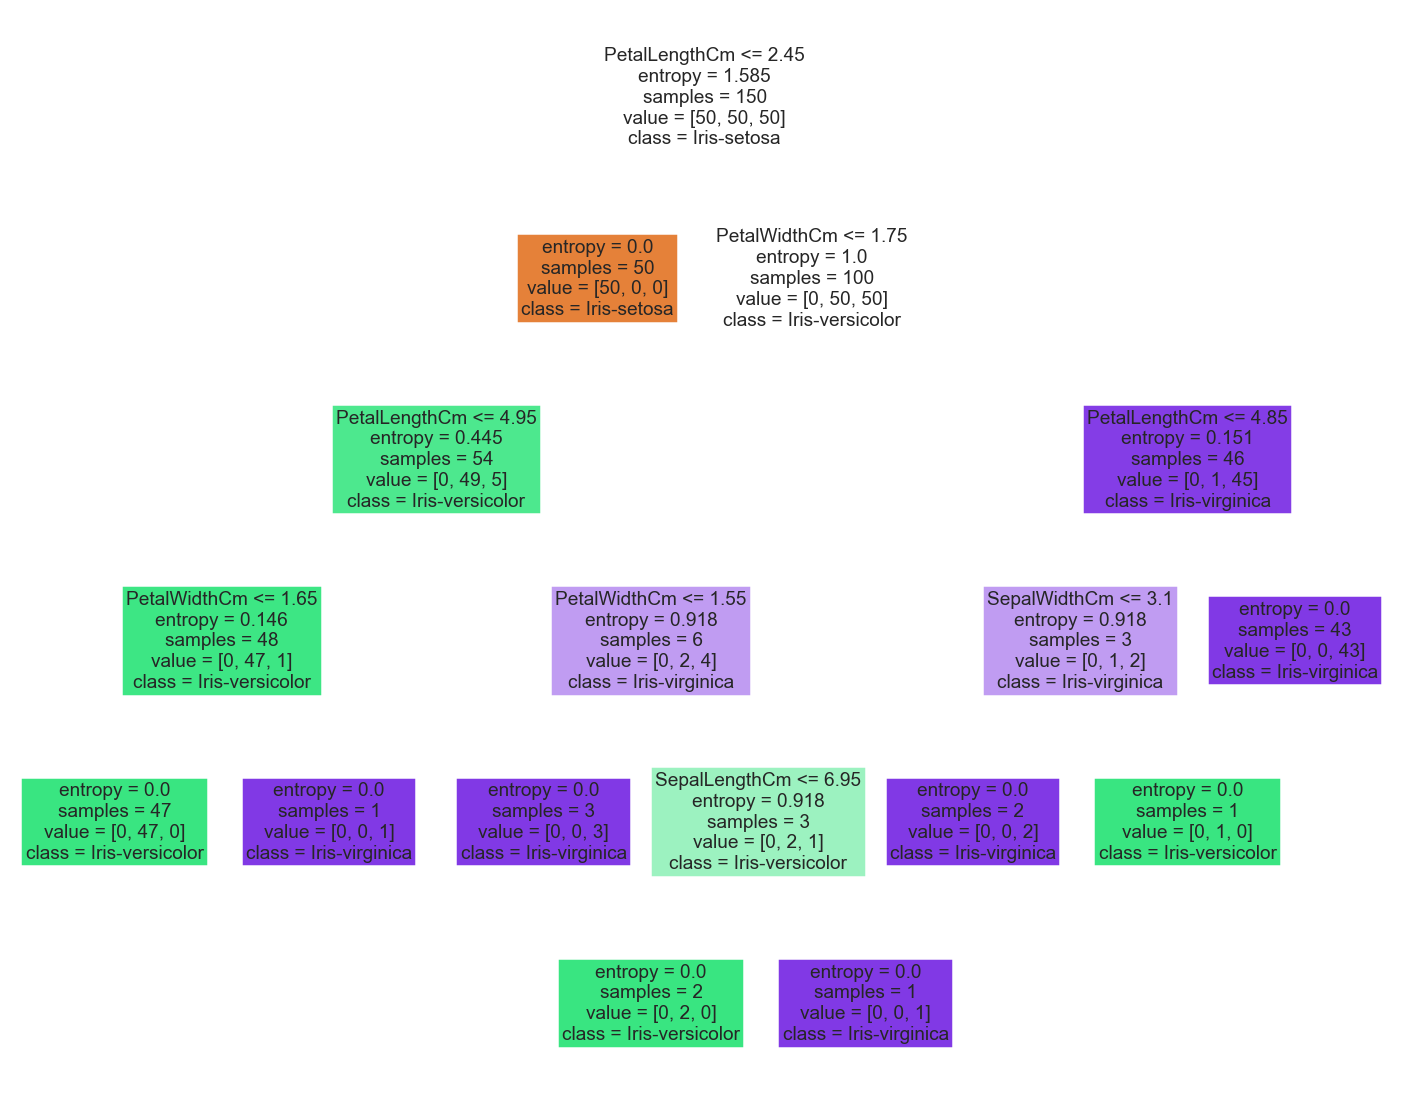

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names= iris_df.columns[:-1],  
                   class_names= iris_df['Species'].unique(),
                   filled=True)

# Thank you!